In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZEx = 256
IMAGE_SIZEy=256
CHANNELS=3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "cafe",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZEx,IMAGE_SIZEy),
    batch_size=BATCH_SIZE
)


Found 542 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['miner_img_xml', 'rust_xml_image']

In [5]:
len(dataset)

17

In [6]:
train_size = 0.8
len(dataset)*train_size

13.600000000000001

In [7]:
train_ds = dataset.take(13)
len(train_ds)

13

In [8]:
test_ds = dataset.skip(13)
len(test_ds)

4

In [9]:
val_size=0.1
len(dataset)*val_size

1.7000000000000002

In [10]:
val_ds = test_ds.take(1)
len(val_ds)

1

In [11]:
test_ds = test_ds.skip(1)
len(test_ds)

3

In [12]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

13

In [15]:
len(val_ds)

1

In [16]:
len(test_ds)

3

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
from tensorflow.keras import models, layers
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZEx, IMAGE_SIZEy),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [19]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers
CHANNELS = 3

input_shape = (BATCH_SIZE, IMAGE_SIZEx, IMAGE_SIZEy, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [22]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [57]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
13/13 [==============================] - 23s 2s/step - loss: 0.2281 - accuracy: 0.9179 - val_loss: 0.2370 - val_accuracy: 0.8750
Epoch 2/50
13/13 [==============================] - 23s 2s/step - loss: 0.2012 - accuracy: 0.9130 - val_loss: 0.1463 - val_accuracy: 0.9375
Epoch 3/50
13/13 [==============================] - 23s 2s/step - loss: 0.1309 - accuracy: 0.9372 - val_loss: 0.1409 - val_accuracy: 0.9375
Epoch 4/50
13/13 [==============================] - 23s 2s/step - loss: 0.1596 - accuracy: 0.9517 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 5/50
13/13 [==============================] - 23s 2s/step - loss: 0.2337 - accuracy: 0.9106 - val_loss: 0.1507 - val_accuracy: 0.9062
Epoch 6/50
13/13 [==============================] - 23s 2s/step - loss: 0.1113 - accuracy: 0.9662 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 23s 2s/step - loss: 0.0593 - accuracy: 0.9807 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 8/50
13/13 [==

In [58]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 375ms/step - loss: 8.0111e-04 - accuracy: 1.0000


In [59]:
scores


[0.00080111064016819, 1.0]

In [60]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 13}

In [61]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
type(history.history['loss'])


list

In [63]:
len(history.history['accuracy'])


50

In [64]:
history.history['val_accuracy']

[0.875,
 0.9375,
 0.9375,
 1.0,
 0.90625,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [67]:
history.history['loss'][:5]

[0.22806479036808014,
 0.20122770965099335,
 0.13086089491844177,
 0.15963086485862732,
 0.2337186485528946]

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


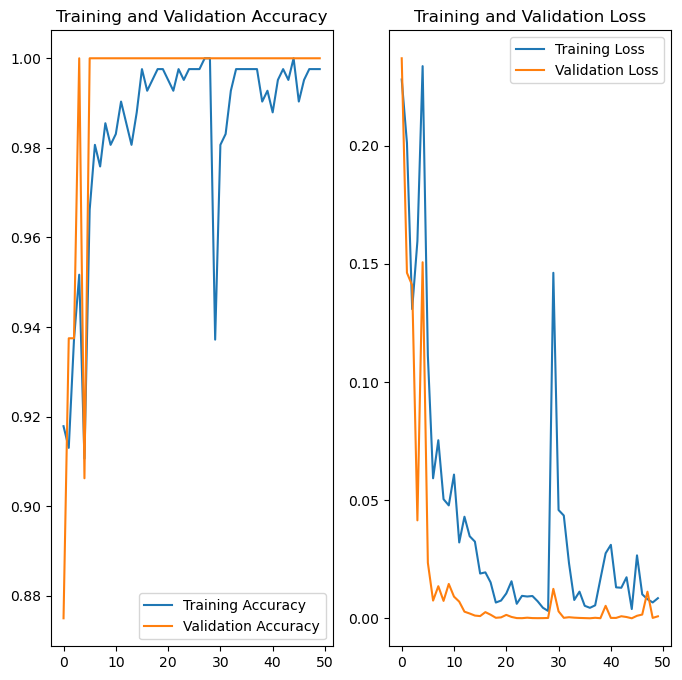

In [69]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: miner_img_xml
1/1 [==============================] - 0s 386ms/step
predicted label: miner_img_xml


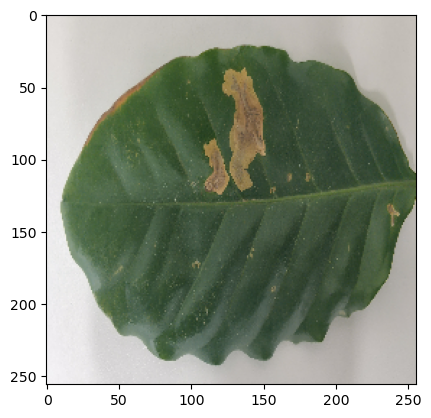

In [70]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [71]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


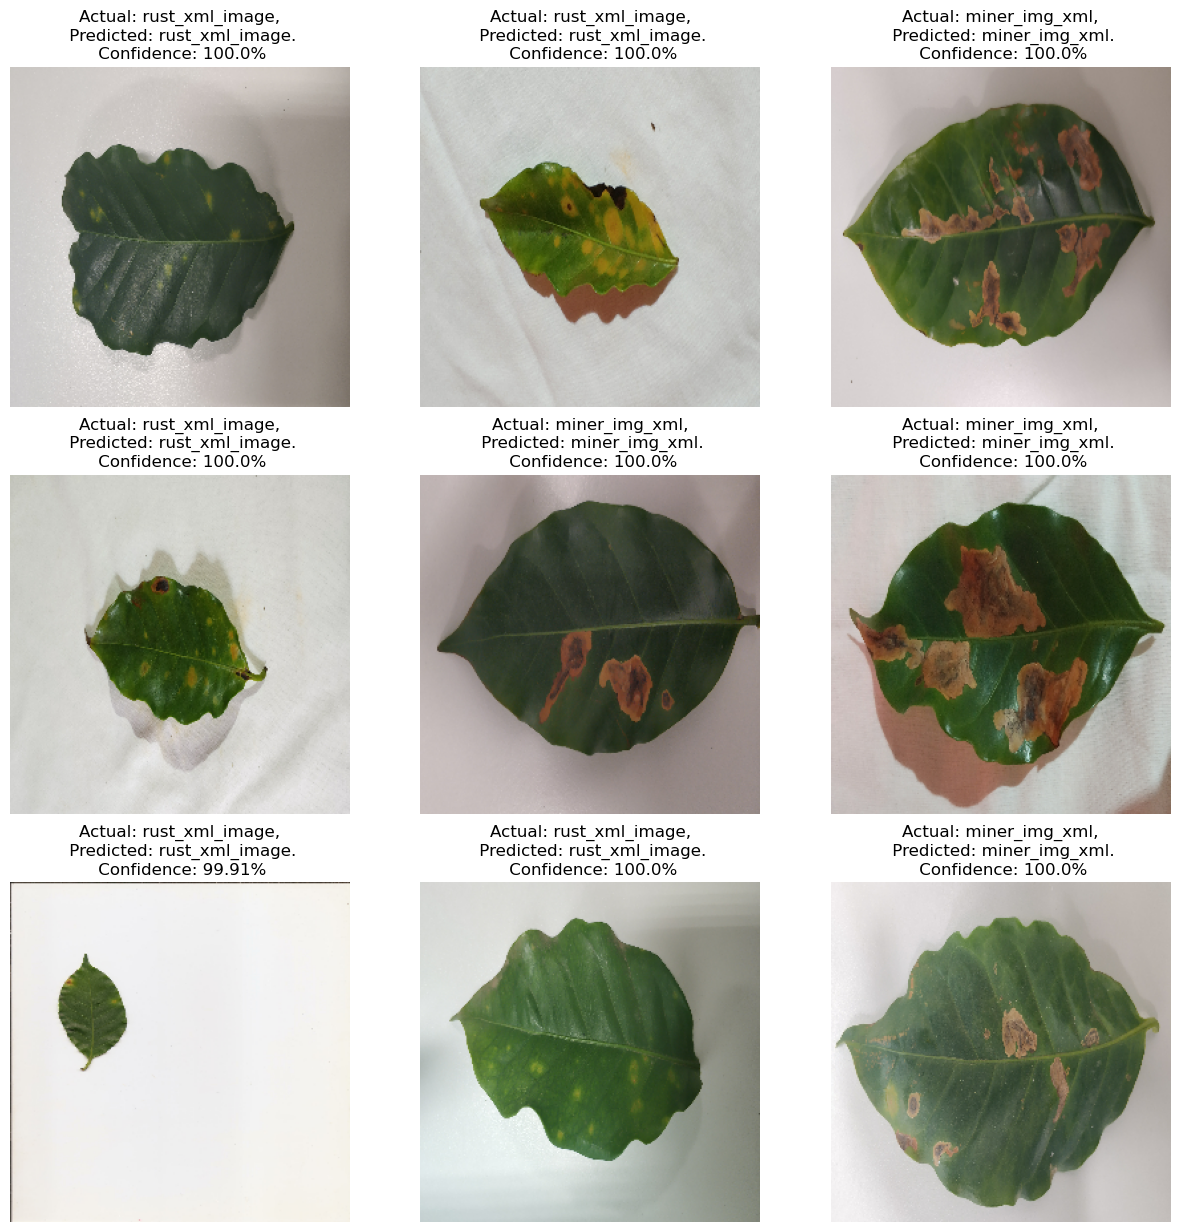

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [74]:
model_version = 1
model.save(r"C:\Users\frede\agricultura\model\1")

INFO:tensorflow:Assets written to: C:\Users\frede\agricultura\model\1\assets


INFO:tensorflow:Assets written to: C:\Users\frede\agricultura\model\1\assets
